In [1]:
!rm -rf /content/Split_data

In [2]:
!unzip -q '/content/drive/MyDrive/custom model/Split_data.zip' -d /content/

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

In [4]:
training_data_path =  '/content/Split_data/Train/Group_9'
validation_data_path = '/content/Split_data/Validation/Group_9'

In [5]:
os.listdir(training_data_path)

['masala_dosa', 'kulfi', 'momos']

In [6]:
os.listdir(validation_data_path)

['masala_dosa', 'kulfi', 'momos']

In [7]:
os.listdir(training_data_path+'/masala_dosa')

['142.jpg',
 '021.jpg',
 '216.jpg',
 '240.jpg',
 '266.jpg',
 'download.jpg',
 '015.jpg',
 '063.jpg',
 '036.jpg',
 '105.jpg',
 '265.jpg',
 '144.jpg',
 '007.jpg',
 '020.jpg',
 '018.jpg',
 '202.jpg',
 '003.jpg',
 '262.jpg',
 'images.jpg',
 '235.jpg',
 '046.jpg',
 '078.jpg',
 '307.jpg',
 '088.jpg',
 '200.jpg',
 '297.jpg',
 '132.jpg',
 '070.jpg',
 '092.jpg',
 '048.jpg',
 '146.jpg',
 '111.jpg',
 '077.jpg',
 '284.jpg',
 '278.jpg',
 '296.jpg',
 '221.jpg',
 '251.jpg',
 '302.jpg',
 '069.jpg',
 '049.jpg',
 '067.jpg',
 '009.jpg',
 '012.jpg',
 'download (3).jpg',
 'images (15).jpg',
 'images (2).jpg',
 '085.jpg',
 '151.jpg',
 '190.jpg',
 '027.jpg',
 '269.jpg',
 '188.jpg',
 '260.jpg',
 '030.jpg',
 '161.jpg',
 'images (7).jpg',
 'images (12).jpg',
 '041.jpg',
 '196.jpg',
 '101.jpg',
 '166.jpg',
 '159.jpg',
 '204.jpg',
 '127.jpg',
 '032.jpg',
 '295.jpg',
 '293.jpg',
 '246.jpg',
 'images (5).jpg',
 '194.jpg',
 '249.jpg',
 '081.jpg',
 '169.jpg',
 '255.jpg',
 '229.jpg',
 '094.jpg',
 '005.jpg',
 '045.jpg'

In [11]:
os.listdir(training_data_path+'/kulfi')

['142.jpg',
 'download.jpg',
 '038.jpg',
 '015.jpg',
 '063.jpg',
 '236.jpg',
 '036.jpg',
 '131.jpg',
 '105.jpg',
 '080.jpg',
 '087.jpg',
 '018.jpg',
 '202.jpg',
 '162.jpg',
 '174.jpg',
 '003.jpg',
 '208.jpg',
 '219.jpg',
 '163.jpg',
 '134.jpg',
 '078.jpg',
 '178.jpg',
 'images (4).jpg',
 '088.jpg',
 '053.jpg',
 '220.jpg',
 '205.jpg',
 'download (2).jpg',
 '062.jpg',
 '075.jpg',
 '209.jpg',
 '111.jpg',
 '106.jpg',
 '184.jpg',
 '089.jpg',
 '006.jpg',
 '102.jpg',
 '091.jpg',
 '104.jpg',
 '069.jpg',
 '040.jpg',
 '115.jpg',
 '172.jpg',
 '012.jpg',
 'images (15).jpg',
 '215.jpg',
 'images (2).jpg',
 '230.jpg',
 '073.jpg',
 '177.jpg',
 '137.jpg',
 '027.jpg',
 '023.jpg',
 '103.jpg',
 '030.jpg',
 '161.jpg',
 '041.jpg',
 '196.jpg',
 '100.jpg',
 '140.jpg',
 '166.jpg',
 '004.jpg',
 '195.jpg',
 'images (22).jpg',
 '198.jpg',
 '098.jpg',
 '054.jpg',
 'images (5).jpg',
 '068.jpg',
 '194.jpg',
 '113.jpg',
 '183.jpg',
 '154.jpg',
 '237.jpg',
 '005.jpg',
 '044.jpg',
 '155.jpg',
 '212.jpg',
 'images (3).

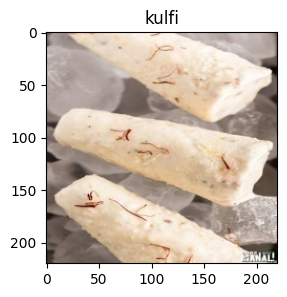

In [8]:
plt.figure(figsize=(5,3))
plt.title('kulfi')
Baked_potato = plt.imread(training_data_path + '/kulfi/002.jpg')
plt.imshow(Baked_potato)
plt.show()

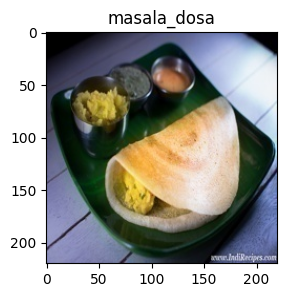

In [9]:
plt.figure(figsize=(5,3))
plt.title('masala_dosa')
Donut = plt.imread(training_data_path + '/masala_dosa/007.jpg')
plt.imshow(Donut)
plt.show()

**Image Data Augumentation**

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
training_set = ImageDataGenerator(rescale = 1 / 255,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_set = ImageDataGenerator(rescale = 1 / 255,rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [13]:
labels = ['masala_dosa', 'kulfi', 'momos']

In [14]:
train_input_data = training_set.flow_from_directory(training_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 20)

val_input_data = validation_set.flow_from_directory(validation_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 20)

Found 360 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [15]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.applications import ResNet50

In [16]:
import warnings
warnings.filterwarnings('ignore')

# Model architecture

model = Sequential()

# 1st Filter (or) Hidden layer
model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', padding='valid', strides=1, input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Filter (or) Hidden layer
model.add(Conv2D(32 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Filter (or) Hidden layer
model.add(Conv2D(8 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th Filter (or) Hidden layer
model.add(Conv2D(4 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(2,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [17]:
num_classes = 3

resnet50_model = ResNet50(input_shape=(256, 256, 3),
                          weights='imagenet',
                          include_top=False)

for layer in resnet50_model.layers:
    layer.trainable = False

x = Flatten()(resnet50_model.output)
h1_out = Dense(128, kernel_initializer='he_uniform', activation='relu')(x)
h2_out = Dense(16, kernel_initializer='he_uniform', activation='relu')(h1_out)
output = Dense(num_classes, kernel_initializer='glorot_uniform', activation='softmax')(h2_out)

model = Model(inputs=resnet50_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [18]:
resnet50_model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [19]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [20]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_input_data,
    epochs=50,
    validation_data=val_input_data
)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 885ms/step - accuracy: 0.3488 - loss: 1.5430 - val_accuracy: 0.3167 - val_loss: 1.2547
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 567ms/step - accuracy: 0.4322 - loss: 1.1379 - val_accuracy: 0.5000 - val_loss: 1.0036
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 476ms/step - accuracy: 0.4239 - loss: 1.0182 - val_accuracy: 0.3917 - val_loss: 1.1061
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 493ms/step - accuracy: 0.4331 - loss: 1.0094 - val_accuracy: 0.5333 - val_loss: 0.9474
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 421ms/step - accuracy: 0.5055 - loss: 0.9451 - val_accuracy: 0.5000 - val_loss: 0.9895
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 633ms/step - accuracy: 0.4733 - loss: 0.9602 - val_accuracy: 0.4417 - val_loss: 1.0653
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 524ms/step - accuracy: 0.4824 - loss: 0.9967 - val_accuracy: 0.3750 - val_loss: 1.4721
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 501ms/step - accuracy: 0.3927 - loss: 1.2756 - val_accuracy:

**test_model**

In [21]:
import cv2

In [22]:
labels

['masala_dosa', 'kulfi', 'momos']

In [23]:
train_input_data.class_indices

{'masala_dosa': 0, 'kulfi': 1, 'momos': 2}

In [24]:
def fun(path):
    global model, train_input_data

    # --- 1. Load and preprocess the image ---
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {path}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, (256, 256))
    normalized = resized / 255.0
    input_image = np.expand_dims(normalized, axis=0)

    # --- 2. Predict using the model ---
    pred = model.predict(input_image, verbose=0)

    # --- 3. Get class mapping dynamically ---
    # train_input_data.class_indices gives {'Taco': 0, 'Pizza': 1, 'Baked_potato': 2}
    mapping = train_input_data.class_indices
    inv_map = {v: k for k, v in mapping.items()}

    # --- 4. Get predicted class ---
    predicted_index = int(np.argmax(pred))
    predicted_label = inv_map.get(predicted_index, "Unknown Class")

    # --- 5. Debugging info ---
    print("\nGroup class mapping:", mapping)
    print("Model output probabilities:", np.round(pred, 3))
    print(f"Predicted class index: {predicted_index}")
    print(f"Predicted label: {predicted_label}\n")

    # --- 6. Display image with prediction ---
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()


Group class mapping: {'masala_dosa': 0, 'kulfi': 1, 'momos': 2}
Model output probabilities: [[0.792 0.176 0.032]]
Predicted class index: 0
Predicted label: masala_dosa



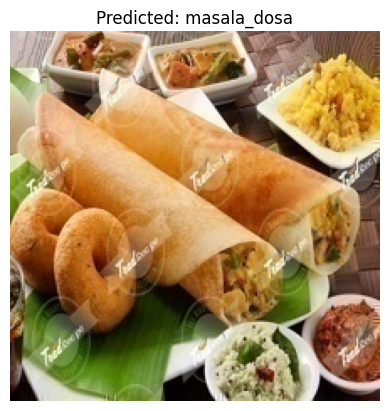

In [25]:
fun('/content/Split_data/Train/Group_9/masala_dosa/032.jpg')


Group class mapping: {'masala_dosa': 0, 'kulfi': 1, 'momos': 2}
Model output probabilities: [[0.276 0.545 0.179]]
Predicted class index: 1
Predicted label: kulfi



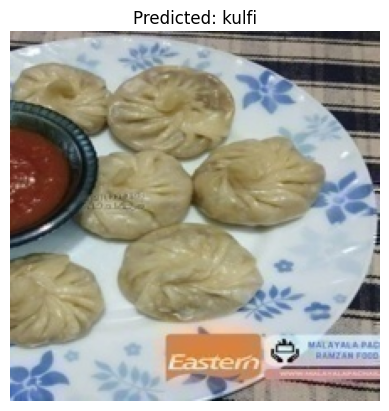

In [26]:
fun('/content/Split_data/Train/Group_9/momos/015.jpg')

In [27]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [28]:
test_data_path = '/content/Split_data/Test/Group_9'

In [29]:
labels =  ['masala_dosa', 'kulfi', 'momos']

In [30]:
test_set = ImageDataGenerator(rescale=1./255)

test_input_data = test_set.flow_from_directory(
    test_data_path,
    classes=labels,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=10,
    shuffle=False
)


Found 120 images belonging to 3 classes.


In [31]:
test_input_data.reset()
predictions = model.predict(test_input_data, verbose=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step


In [32]:
from sklearn.metrics import classification_report, accuracy_score

In [33]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_input_data.classes

In [34]:
y_pred = y_pred.astype(int)
y_true = y_true.astype(int)

In [35]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_input_data.class_indices.keys())))


Classification Report:

              precision    recall  f1-score   support

 masala_dosa       0.55      0.85      0.67        40
       kulfi       0.47      0.35      0.40        40
       momos       0.64      0.45      0.53        40

    accuracy                           0.55       120
   macro avg       0.55      0.55      0.53       120
weighted avg       0.55      0.55      0.53       120



In [36]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.5500


In [37]:
from tensorflow.keras.models import load_model
model.save('/content/resnet50_group9_.h5')
model = load_model('/content/resnet50_group9_.h5')